In [2]:
from torchvision import datasets

dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics',
 'Kinetics400',
 'Kitti',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'Sintel',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_optical_flow',
 'caltech',
 '

In [4]:
dataset_train = datasets.CIFAR10('.', train=True, download=True)
dataset_val = datasets.CIFAR10('.', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
len(dataset_train), len(dataset_val)

(50000, 10000)

In [14]:
img, lbl = dataset_train[159]

(<matplotlib.image.AxesImage at 0x117d66bb0>, 3)

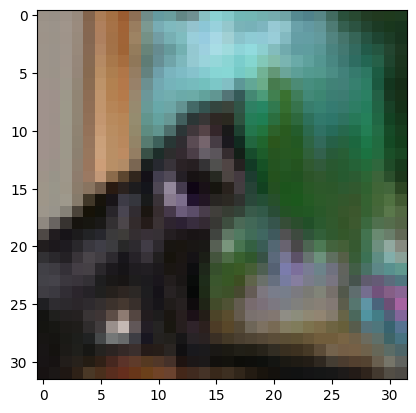

In [15]:
from matplotlib import pyplot as plt

plt.imshow(img), lbl

In [18]:
from torchvision import transforms

dir(transforms)

to_tensor = transforms.ToTensor()
to_tensor(img).shape

torch.Size([3, 32, 32])

In [20]:
dataset_train = datasets.CIFAR10('.', train=True, download=True, transform=transforms.ToTensor())
dataset_val = datasets.CIFAR10('.', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [24]:
img_t, lbl = dataset_train[159]
img_t.shape

torch.Size([3, 32, 32])

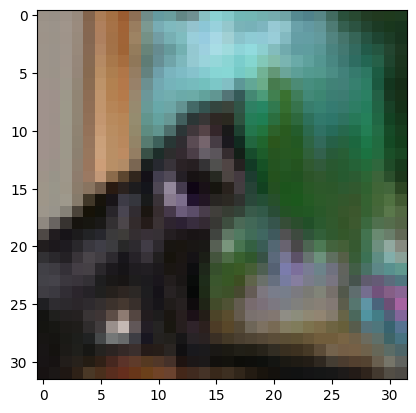

In [29]:
plt.imshow(img_t.permute(1,2,0))

In [34]:
import torch


imgs = torch.stack([img for (img, lbl) in dataset_train], dim = 3)

In [35]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [39]:
imgs.view(3,-1).shape

torch.Size([3, 51200000])

In [44]:
means = imgs.view(3,-1).mean(dim=1)
stds = imgs.view(3,-1).std(dim=1)
means, stds

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [45]:
transforms.Normalize(means.numpy(), stds.numpy())

Normalize(mean=[0.49139965 0.48215845 0.44653094], std=[0.24703224 0.24348514 0.26158786])

In [46]:
dataset_train_trans = datasets.CIFAR10('.', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means.numpy(), stds.numpy())]))


dataset_val_trans = datasets.CIFAR10('.', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means.numpy(), stds.numpy())]))

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


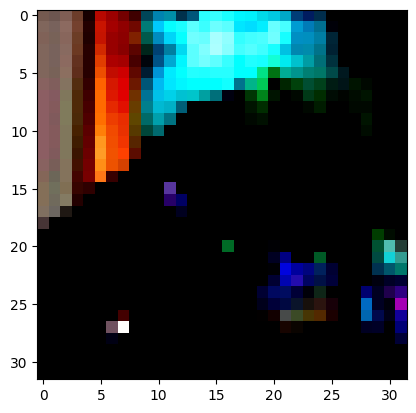

In [70]:
img, lbl = dataset_train_trans[159]
plt.imshow(img.permute(1,2,0))

In [48]:
imgs = torch.stack([img for img, lbl in dataset_train_trans], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [50]:
imgs.view(3, -1).mean(dim=1)
imgs.view(3, -1).std(dim=1)

tensor([1.0000, 1.0000, 1.0000])

In [87]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']

dataset_train_2 = [(img, label_map[lbl]) for img, lbl in dataset_train_trans if lbl in [0,2]]
dataset_val_2 = [(img, label_map[lbl]) for img, lbl in dataset_val_trans if lbl in [0,2]]

len(dataset_train_2), len(dataset_val_2)

(10000, 2000)

In [52]:
import torch.nn as nn

n_classes = 2
model = nn.Sequential(
    nn.Linear(3072,512), # 3072 in features, 512 out features, bias is on
                         # 512 neurons, each neuron has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512,n_classes)
)

In [64]:
x = torch.tensor([[1.,2.,3.], [1, 2., 3.]], dtype=float)
torch.exp(x)

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

sftmx = nn.Softmax(dim = 1)
sftmx(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]], dtype=torch.float64)

In [79]:
model = nn.Sequential(
    nn.Linear(3072,512), # 3072 in features, 512 out features, bias is on
                         # 512 neurons, each neuron has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512,n_classes), #512 in features, n_classes out features, bias is on
                              # n_classes neurons, each having 512 weights, 1 bias
    nn.Softmax(dim = 1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x11d9af2e0>, 0)

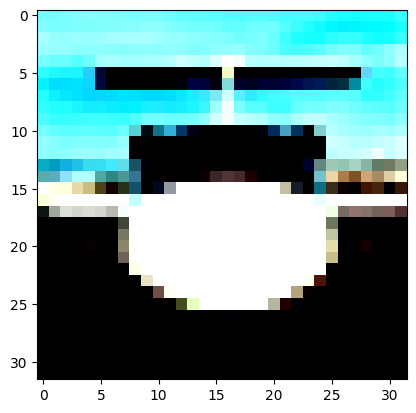

In [90]:
img, lbl = dataset_train_2[99]
plt.imshow(img.permute(1,2,0)), lbl

In [80]:
img = img.view(-1).unsqueeze(0)
model(img)

tensor([[0.5188, 0.4812]], grad_fn=<SoftmaxBackward0>)

In [81]:
model = nn.Sequential(
    nn.Linear(3072,512), # 3072 in features, 512 out features, bias is on
                         # 512 neurons, each neuron has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512,n_classes), #512 in features, n_classes out features, bias is on
                              # n_classes neurons, each having 512 weights, 1 bias
    nn.LogSoftmax(dim = 1)
)

In [83]:
out = model(img)

In [91]:
loss_fn = nn.NLLLoss()
loss_fn(out, torch.tensor([lbl]))

tensor(0.5749, grad_fn=<NllLossBackward0>)